## Walmart Sales Forecasting EDA

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import multiprocessing as mp
from tqdm import tqdm

In [ ]:
#Reading all the Data using pandas
df=pd.read_csv('calendar.csv')
df1=pd.read_csv('sales_train_validation.csv') #this is used for training
df2=pd.read_csv('sell_prices.csv')
df3=pd.read_csv('sales_train_evaluation.csv') # this is used for testing

In [ ]:
df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
df1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
df3.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
df2.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:

print("Shape of calender.csv",df.shape)
print("Shape of sales train validation.csv",df1.shape)
print("Shape of sell_price.csv",df2.shape)
print("Shape of sales train evaluation.csv",df3.shape)

Shape of calender.csv (1969, 14)
Shape of sales train validation.csv (30490, 1919)
Shape of sell_price.csv (6841121, 4)
Shape of sales train evaluation.csv (30490, 1947)


In [ ]:
#Clearly in calender.csv we have many entries which contain NaN in event_type_1,event_type_2,event_name_1 & enent_name_2
#I have replaced all those entries with no_event
df=df.fillna(value='no_event')

## Preparing Data to tranform in one Single DataFrame

In [ ]:
l=[]
for i in range(1,1914):
  l.append("d_"+str(i))
df_final=pd.melt(df1,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
#here I am taking only last 28 data days of test bcz eariler values are same as for train
l=[]
for i in range(1914,1942):
  l.append("d_"+str(i))
df_final_test=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
#Also create future data to be used for futures sales data
l=[]
for i in range(1942,1970):
    l.append("d_"+str(i))
df_future_data=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
for i in range(1942,1970):
    df3['d_'+str(i)]=0

In [ ]:
#Now we merge all These 3 dataframes to get final csv file train
data=df_final.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data=data.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
#data.to_csv('final_dataframe.csv',index=False)

In [ ]:
data.to_csv('final_dataframe.csv',index=False)

In [ ]:
#Now we merge all These 3 dataframes to get final csv file test
data_test=df_final_test.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_test=data_test.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv
data_test.to_csv('final_dataframe_test.csv',index=False)

In [ ]:
data_test.to_csv('final_dataframe_test.csv',index=False)

In [ ]:
#Now we merge all These 3 dataframes to get final csv file future data
data_future=df_future_data.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_future=data_future.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_future_data.csv
data_future.fillna('no_event',inplace=True)
#data_future.to_csv('final_future_data.csv',index=False)

In [ ]:
data_future.to_csv('final_future_data.csv',index=False)

In [ ]:
print("Shape of final dataframe train is=",data.shape)
print("Shape of final dataframe test is=",data_test.shape)

Shape of final dataframe train is= (46027957, 22)
Shape of final dataframe test is= (853720, 22)


In [ ]:
#reading up complete dataframe
#data=pd.read_csv('final_dataframe.csv')
#data_test=pd.read_csv('final_dataframe_test.csv')

In [ ]:
print("Head rows of Final DataFrame train")
data.head()

Head rows of Final DataFrame train


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,no_event,no_event,no_event,no_event,1,1,0,0.46
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,no_event,no_event,no_event,no_event,1,0,1,0.46


In [ ]:

print("Complete information about data Frame is:-\n")
print(data.info())

Complete information about data Frame is:-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 7.9+ GB
None


In [ ]:
print("There are these unique stores in this data=",data['store_id'].unique())

There are these unique stores in this data= ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [ ]:
print("There are these sates in data=",data['state_id'].unique())

There are these sates in data= ['CA' 'TX' 'WI']


In [ ]:
print("Unique values of wday features=",data['wday'].unique())
print("Unique values of weekday features=",data['weekday'].unique())

Unique values of wday features= [1 2 3 4 5 6 7]
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [ ]:
print("years for which I have this sales data=",data['year'].unique())

years for which I have this sales data= [2011 2012 2013 2014 2015 2016]


In [ ]:
print("Months in year 2016 for which we have data",data[data['year']==2016]['month'].unique())

Months in year 2016 for which we have data [1 2 3 4]


## EDA

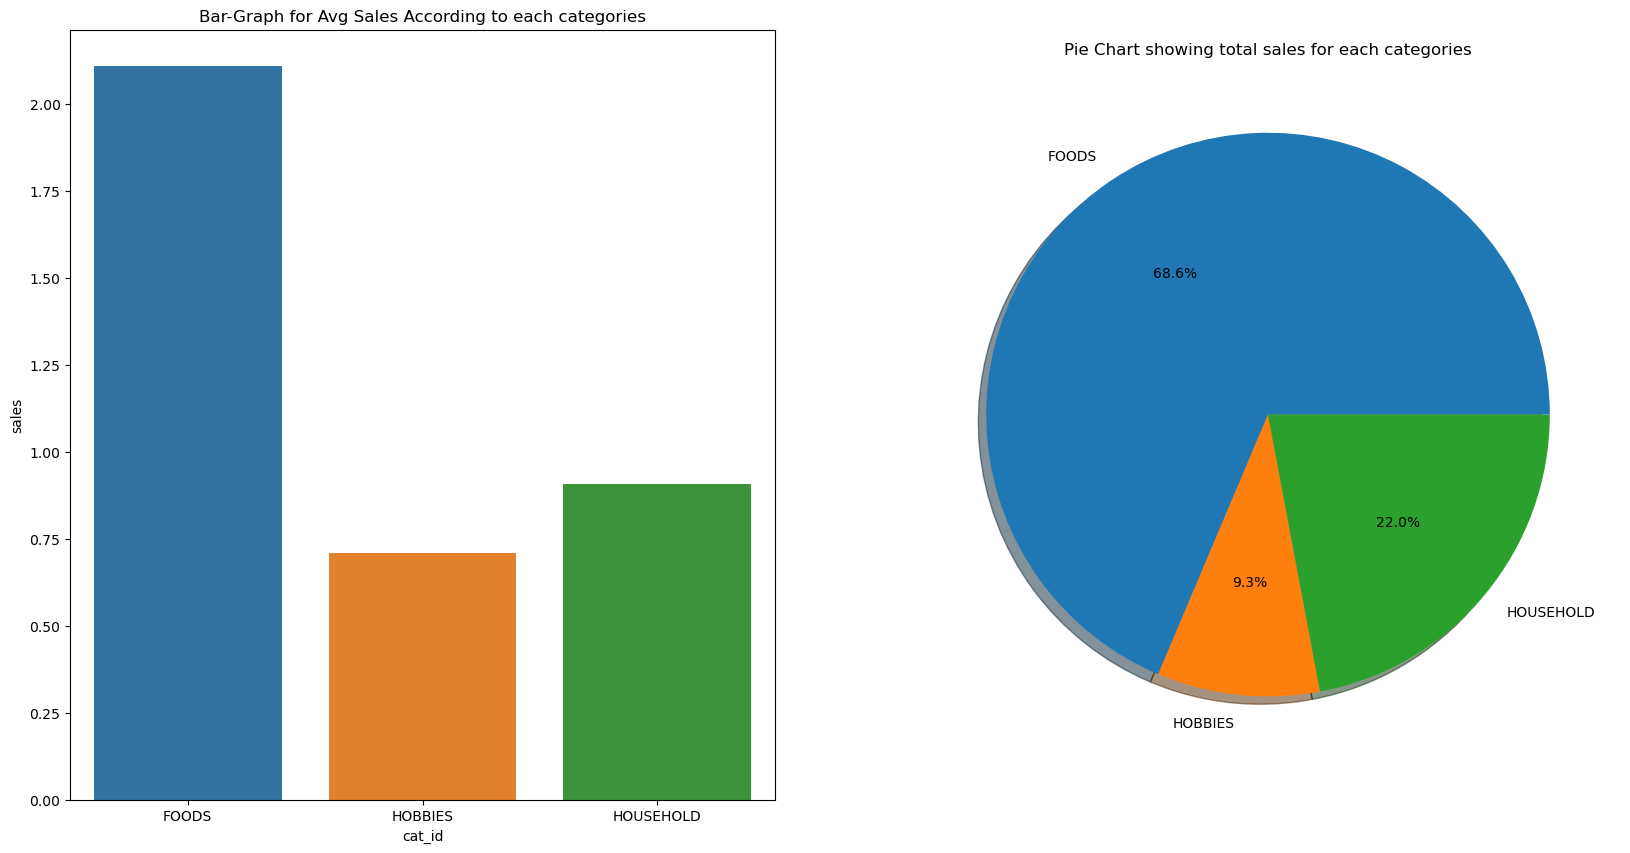

In [ ]:
df=data.groupby('cat_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='cat_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each categories")

plt.subplot(122)
df=data.groupby('cat_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['perc'].values,labels=df['cat_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories")
plt.show()

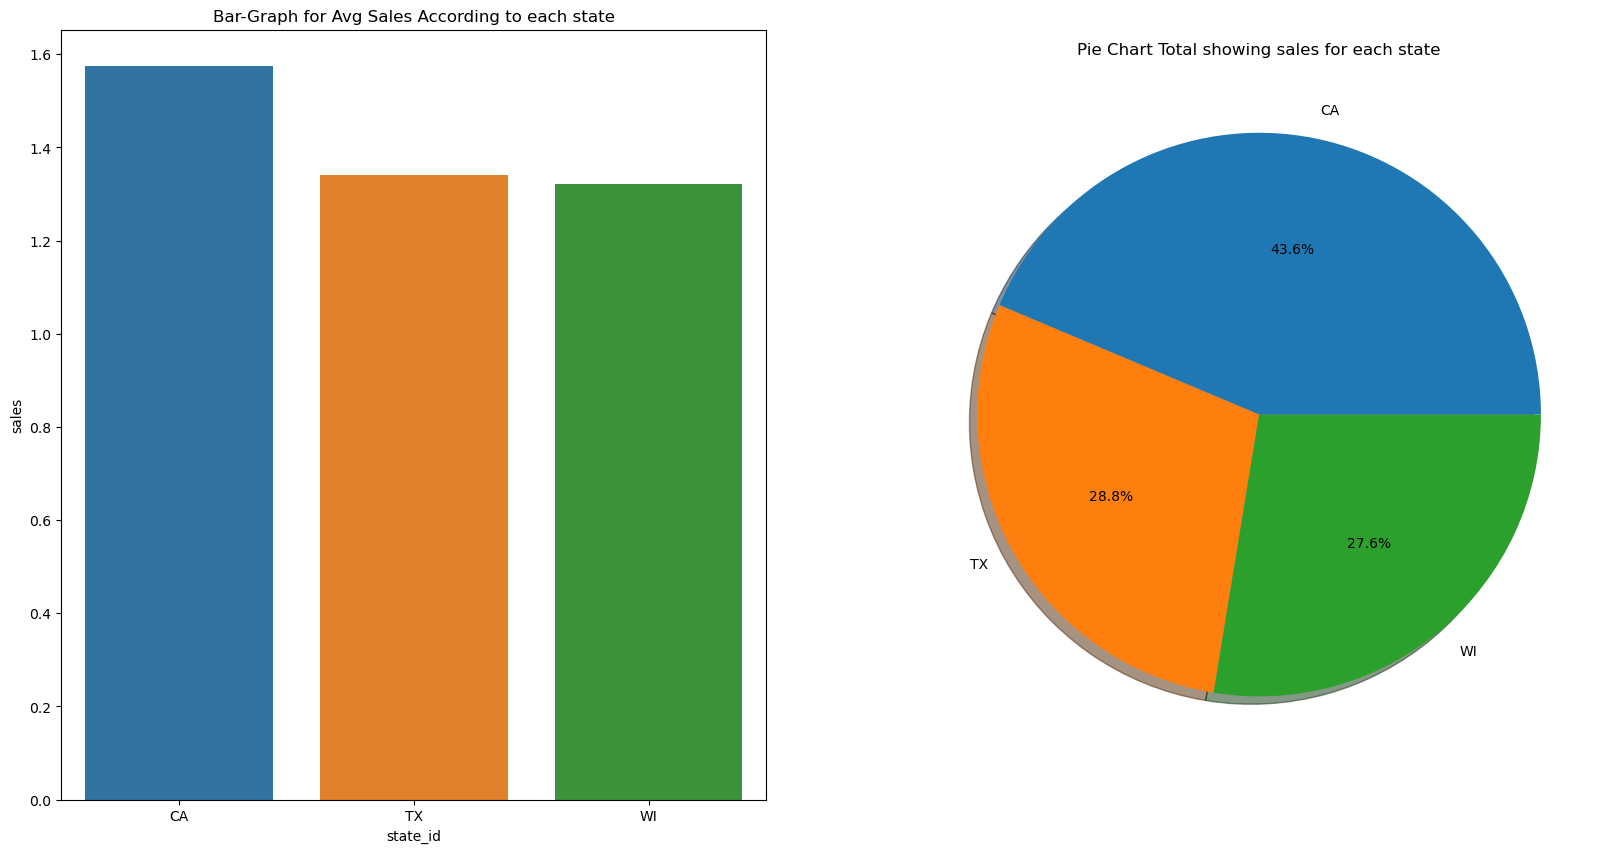

In [ ]:
df=data.groupby('state_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='state_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each state")

df=data.groupby('state_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['state_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart Total showing sales for each state")
plt.show()

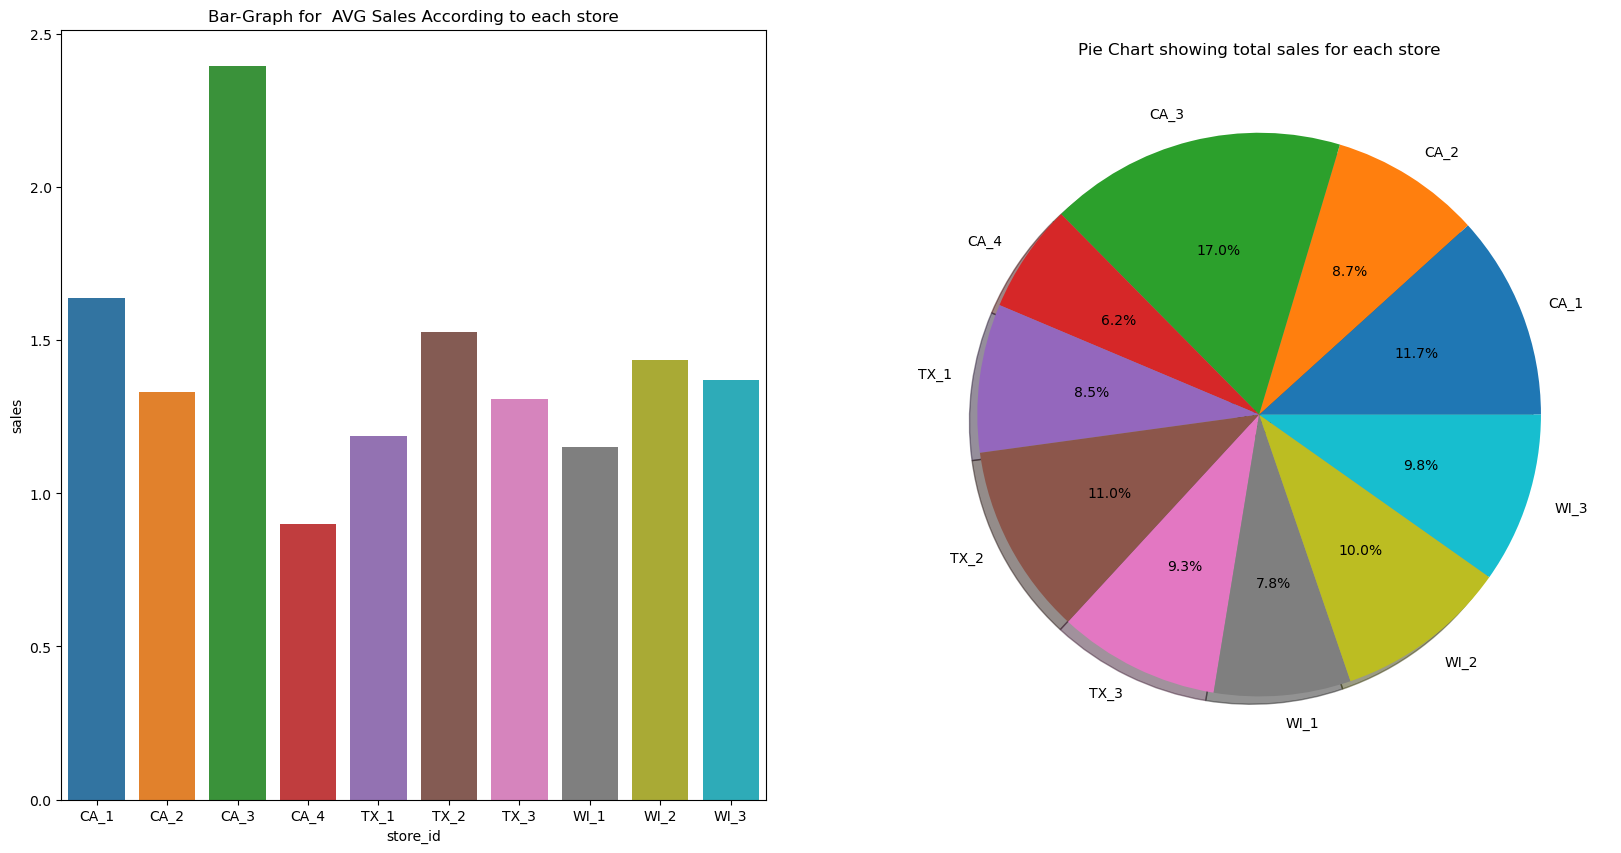

In [ ]:
df=data.groupby('store_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='store_id',y='sales',data=df)
plt.title("Bar-Graph for  AVG Sales According to each store")
df=data.groupby('store_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['store_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each store")

plt.show()

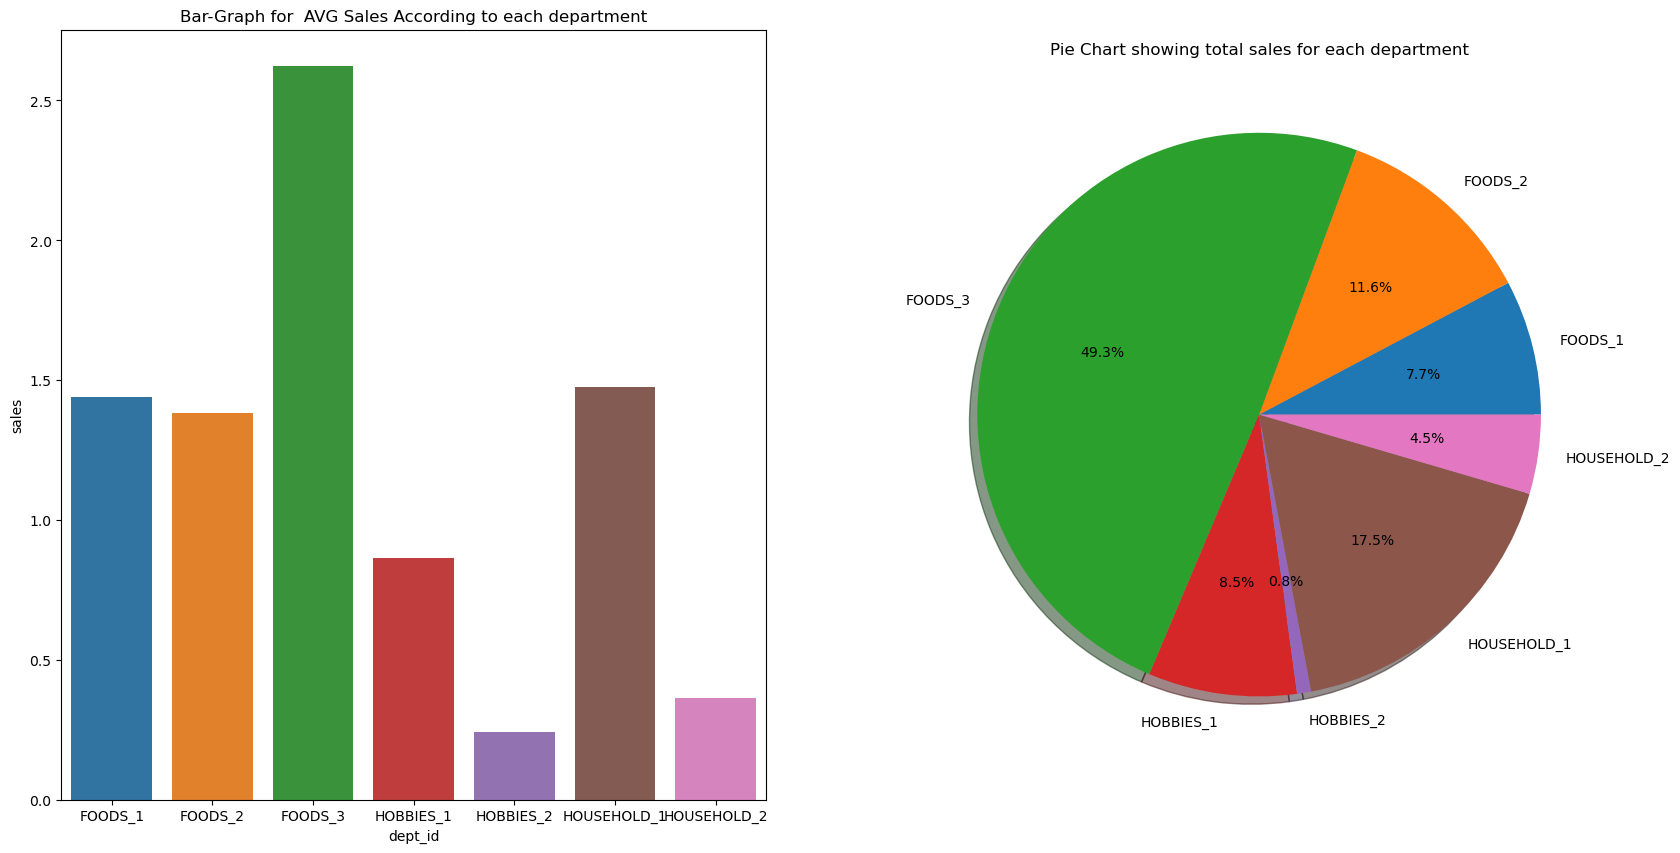

In [ ]:
df=data.groupby('dept_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='dept_id',y='sales',data=df)
plt.title("Bar-Graph for  AVG Sales According to each department")
df=data.groupby('dept_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['dept_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each department")

plt.show()

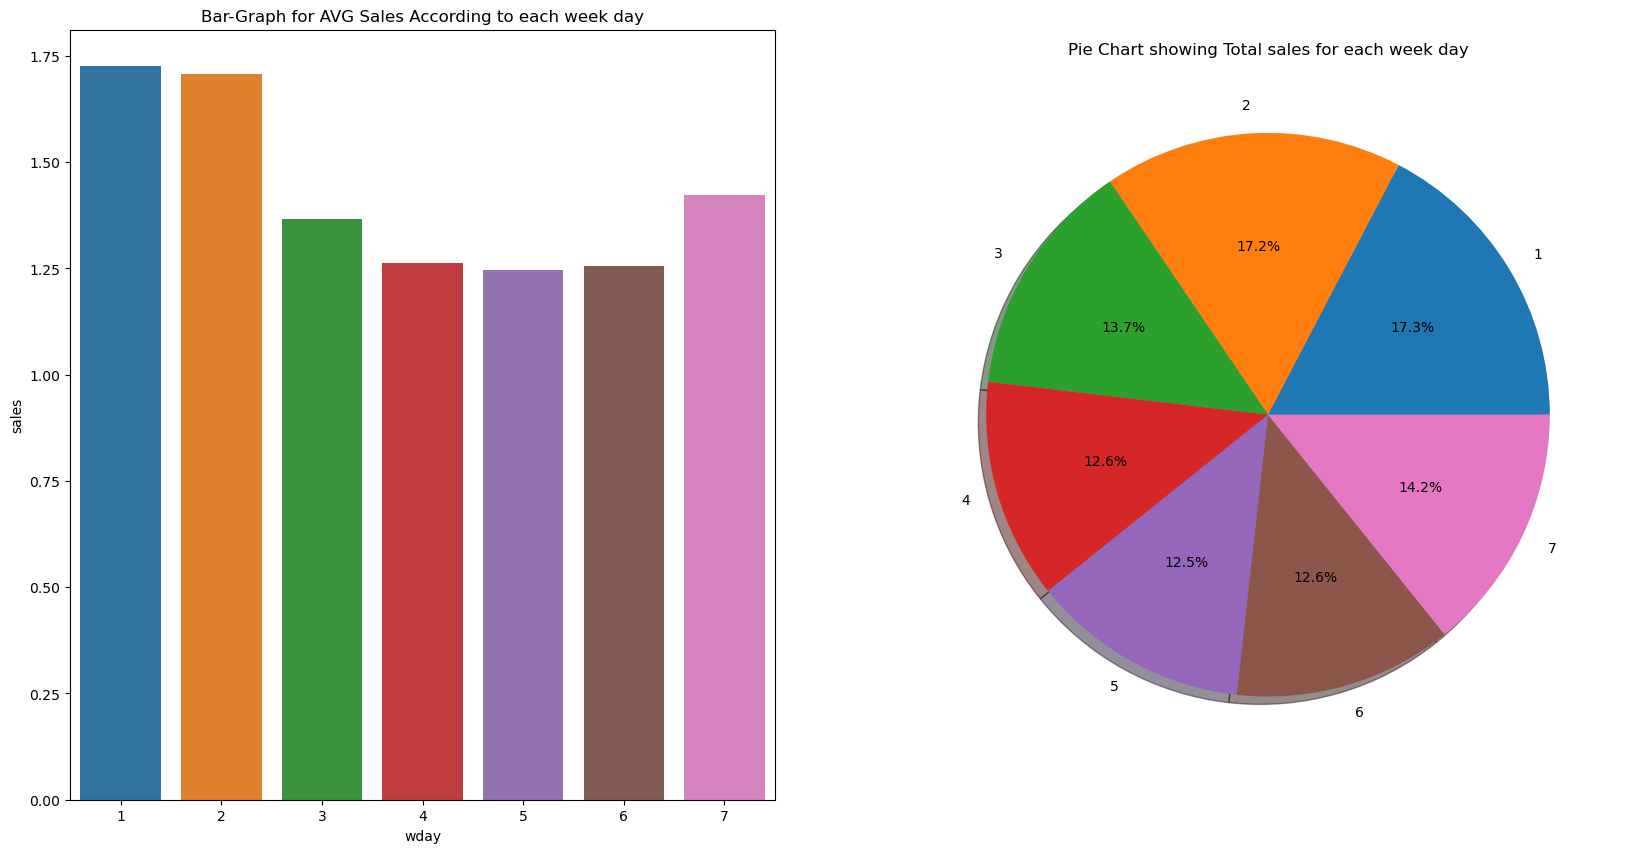

In [ ]:
df=data.groupby('wday').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='wday',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each week day")

df=data.groupby('wday').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['wday'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each week day")

plt.show()

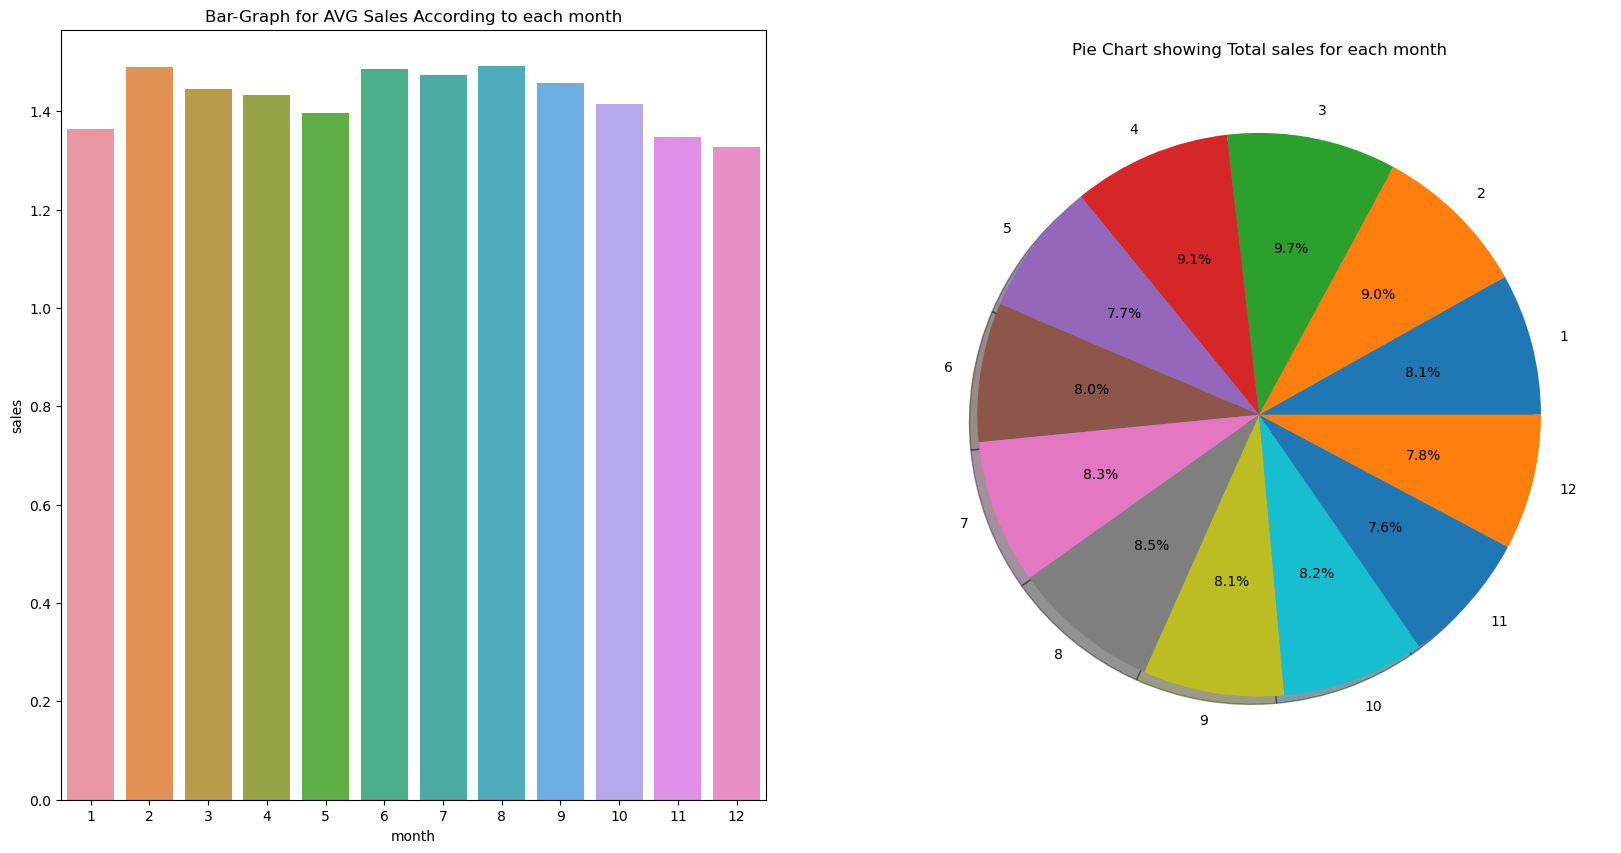

In [ ]:
df=data.groupby('month').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='month',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each month")

df=data.groupby('month').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['month'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each month")

plt.show()

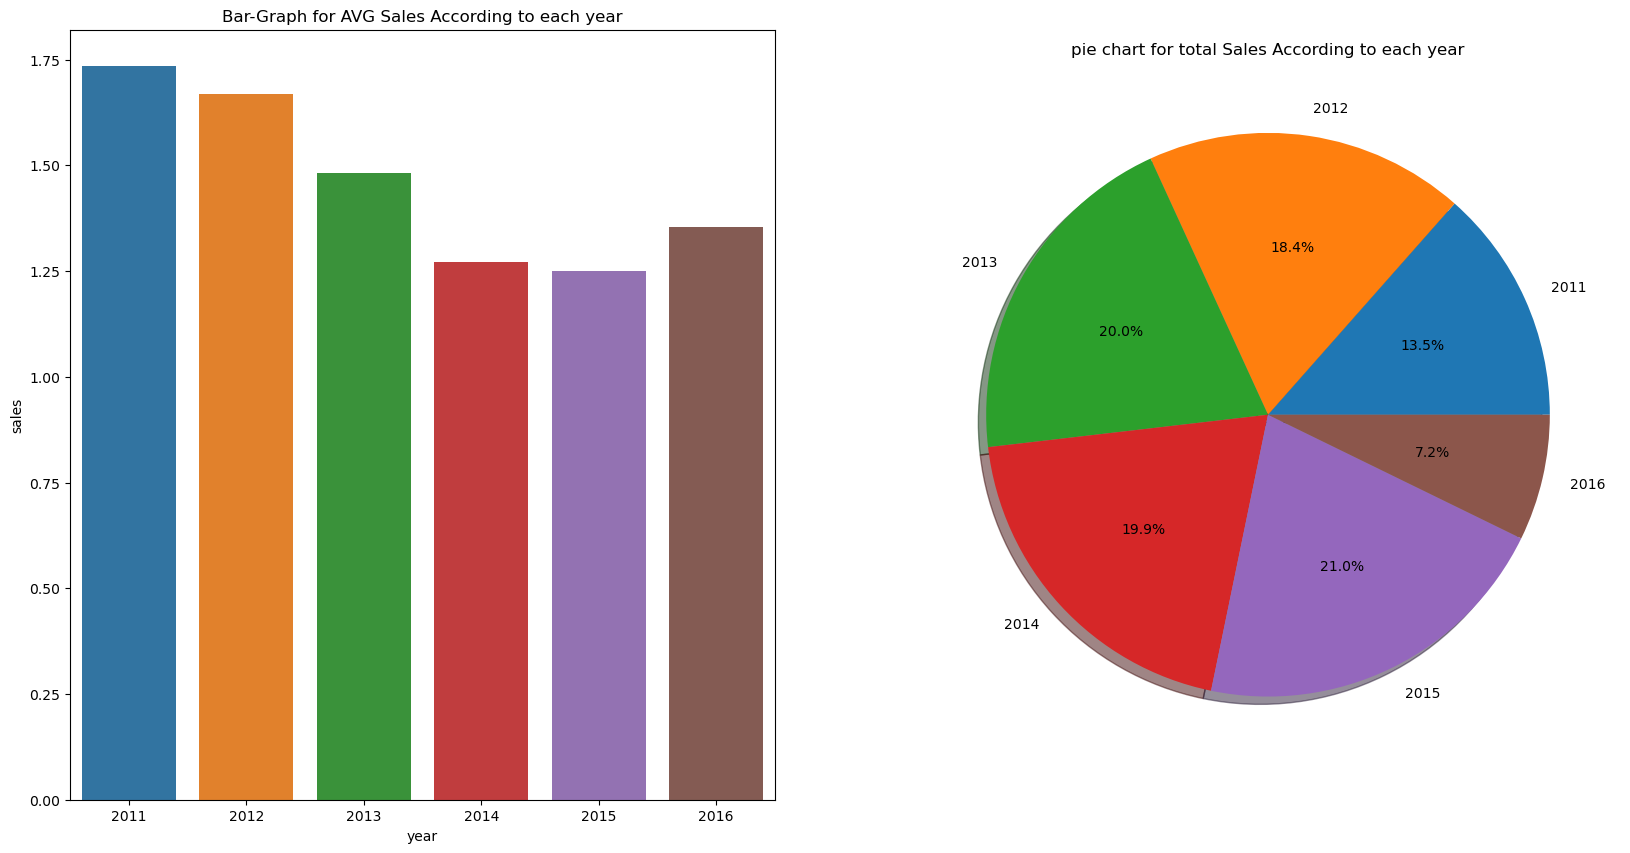

In [ ]:
df=data.groupby('year').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)

sns.barplot(x='year',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each year")

plt.subplot(122)
df=data.groupby('year').sum()
df.reset_index(level=0,inplace=True)
df['year_avg']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['year_avg'].values,labels=df['year'].values,shadow=True,autopct='%1.1f%%')

plt.title("pie chart for total Sales According to each year")
plt.show()

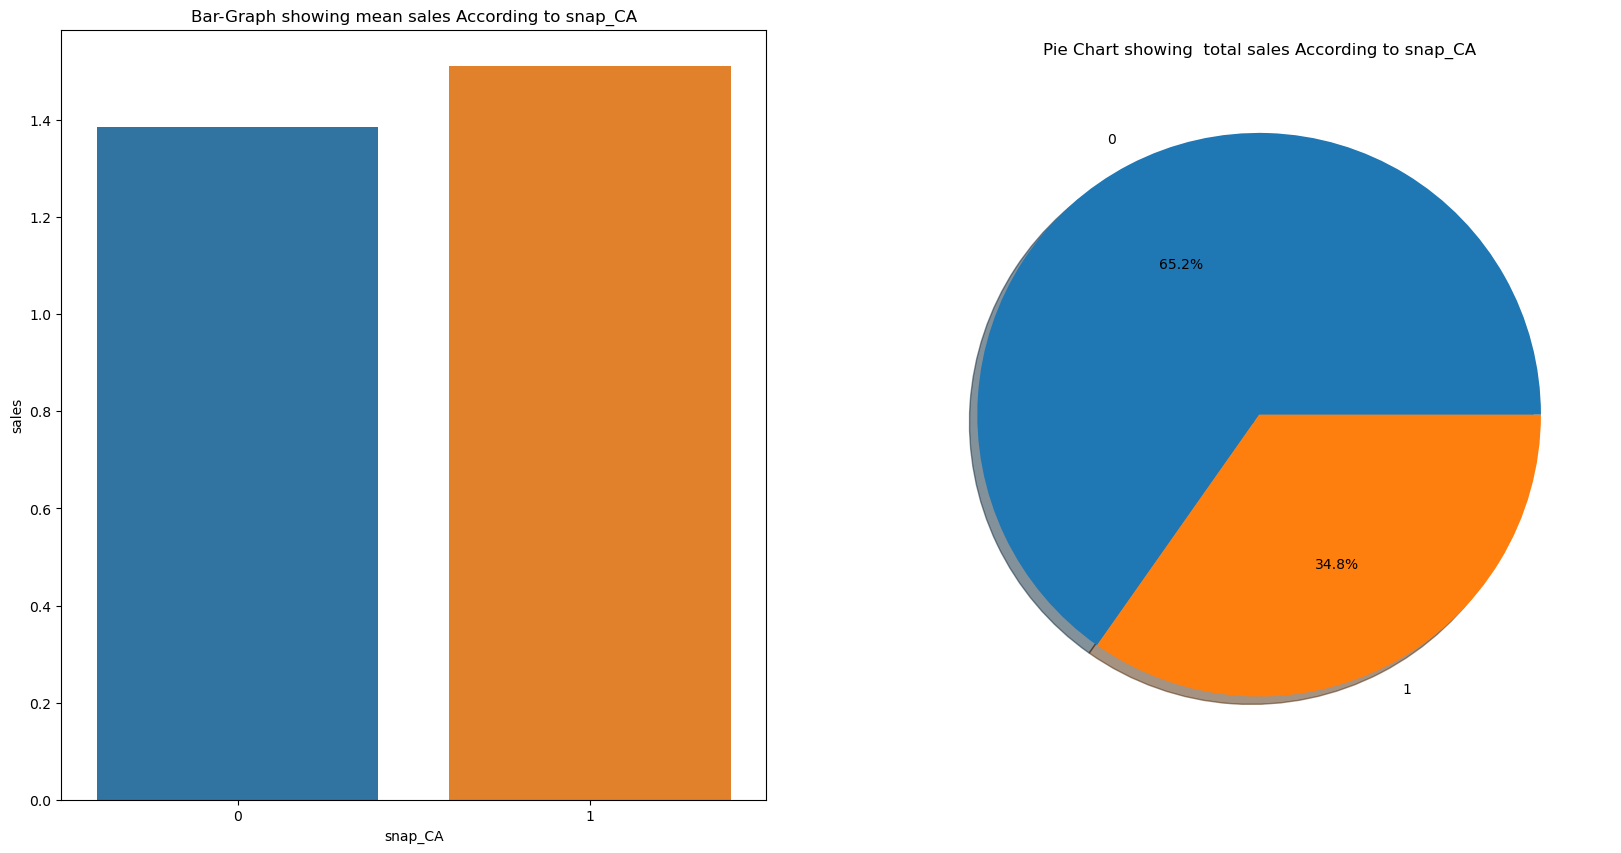

In [ ]:
df=data.groupby('snap_CA').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='snap_CA',y='sales',data=df)
plt.title("Bar-Graph showing mean sales According to snap_CA")

df=data.groupby('snap_CA').sum()
df.reset_index(level=0,inplace=True)
df['snap']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['snap'].values,labels=df['snap_CA'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing  total sales According to snap_CA")

plt.show()

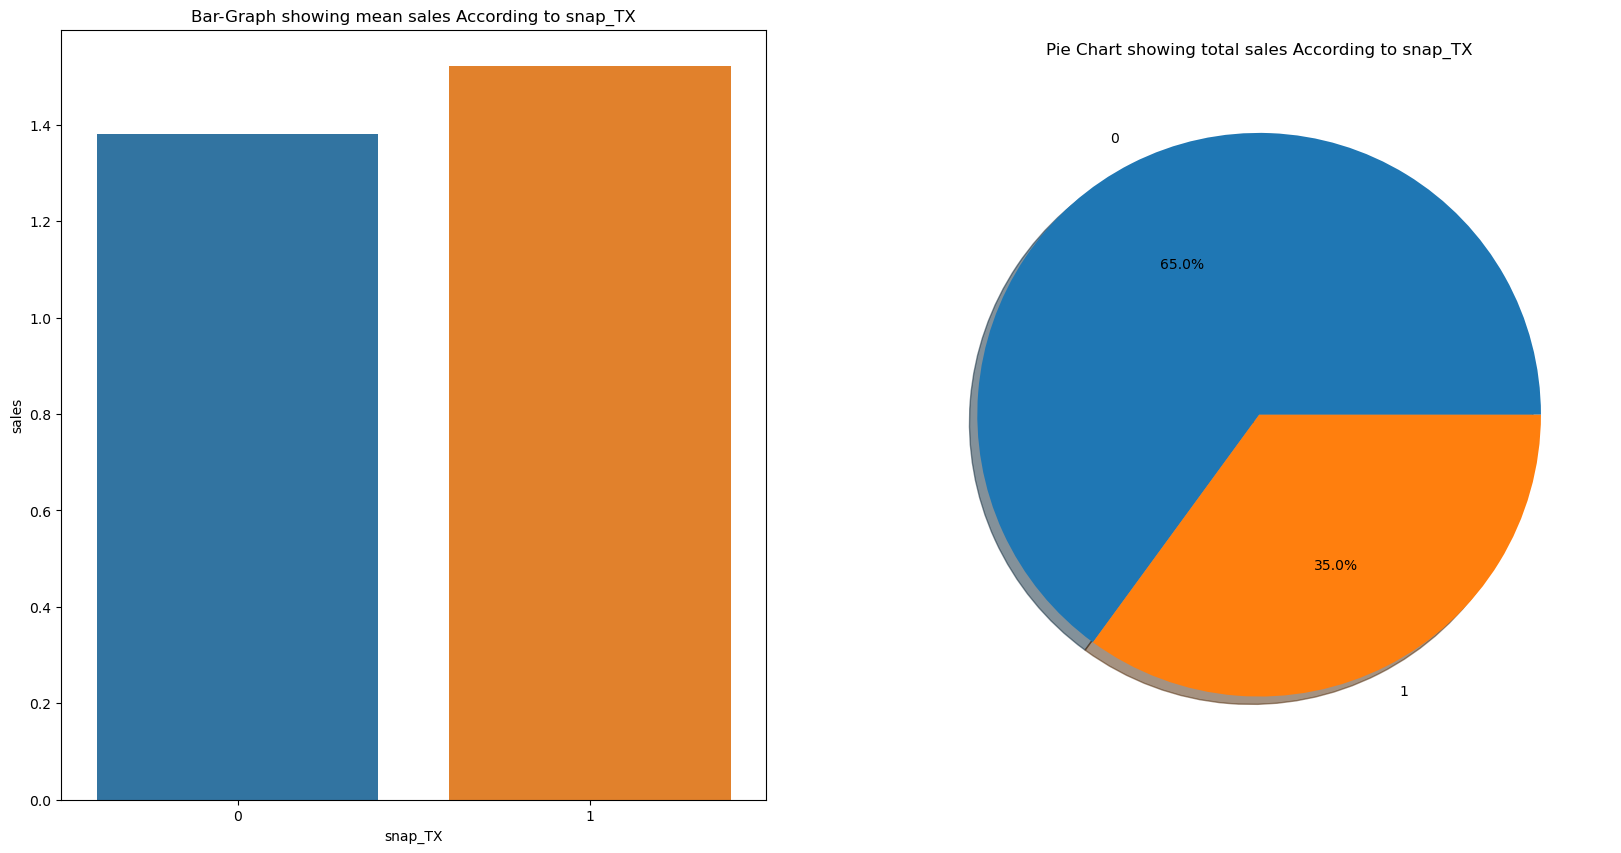

In [ ]:
df=data.groupby('snap_TX').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='snap_TX',y='sales',data=df)
plt.title("Bar-Graph showing mean sales According to snap_TX")

df=data.groupby('snap_TX').sum()
df.reset_index(level=0,inplace=True)
df['snap']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['snap'].values,labels=df['snap_TX'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales According to snap_TX")

plt.show()

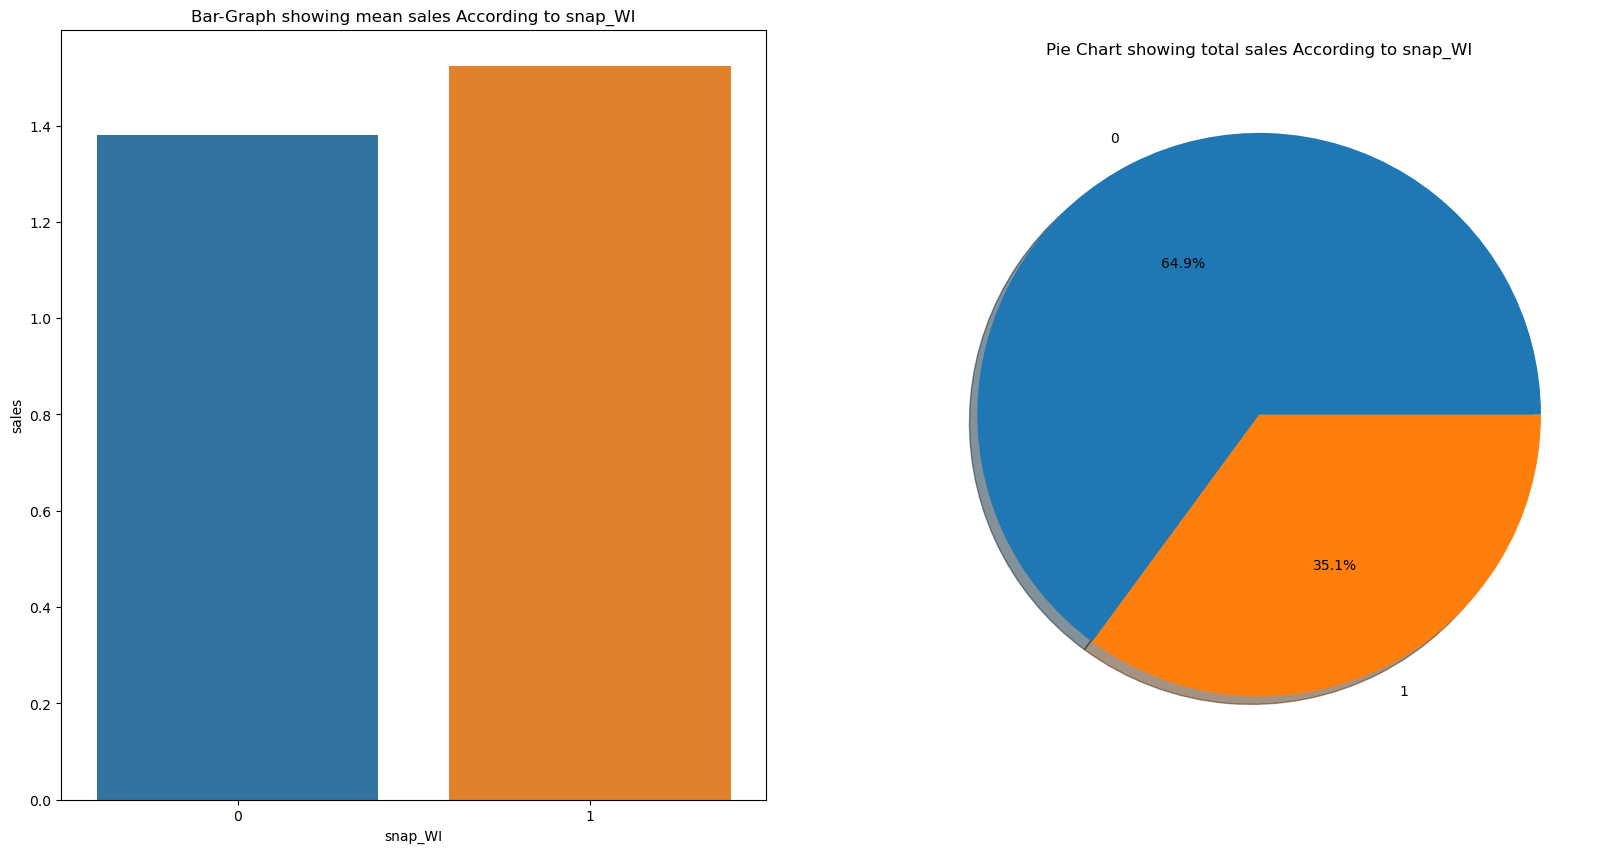

In [ ]:
df=data.groupby('snap_WI').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='snap_WI',y='sales',data=df)
plt.title("Bar-Graph showing mean sales According to snap_WI")

df=data.groupby('snap_WI').sum()
df.reset_index(level=0,inplace=True)
df['snap']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['snap'].values,labels=df['snap_WI'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales According to snap_WI")

plt.show()

In [ ]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,0.46
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,no_event,no_event,no_event,no_event,1,1,0,0.46
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,no_event,no_event,no_event,no_event,1,0,1,0.46


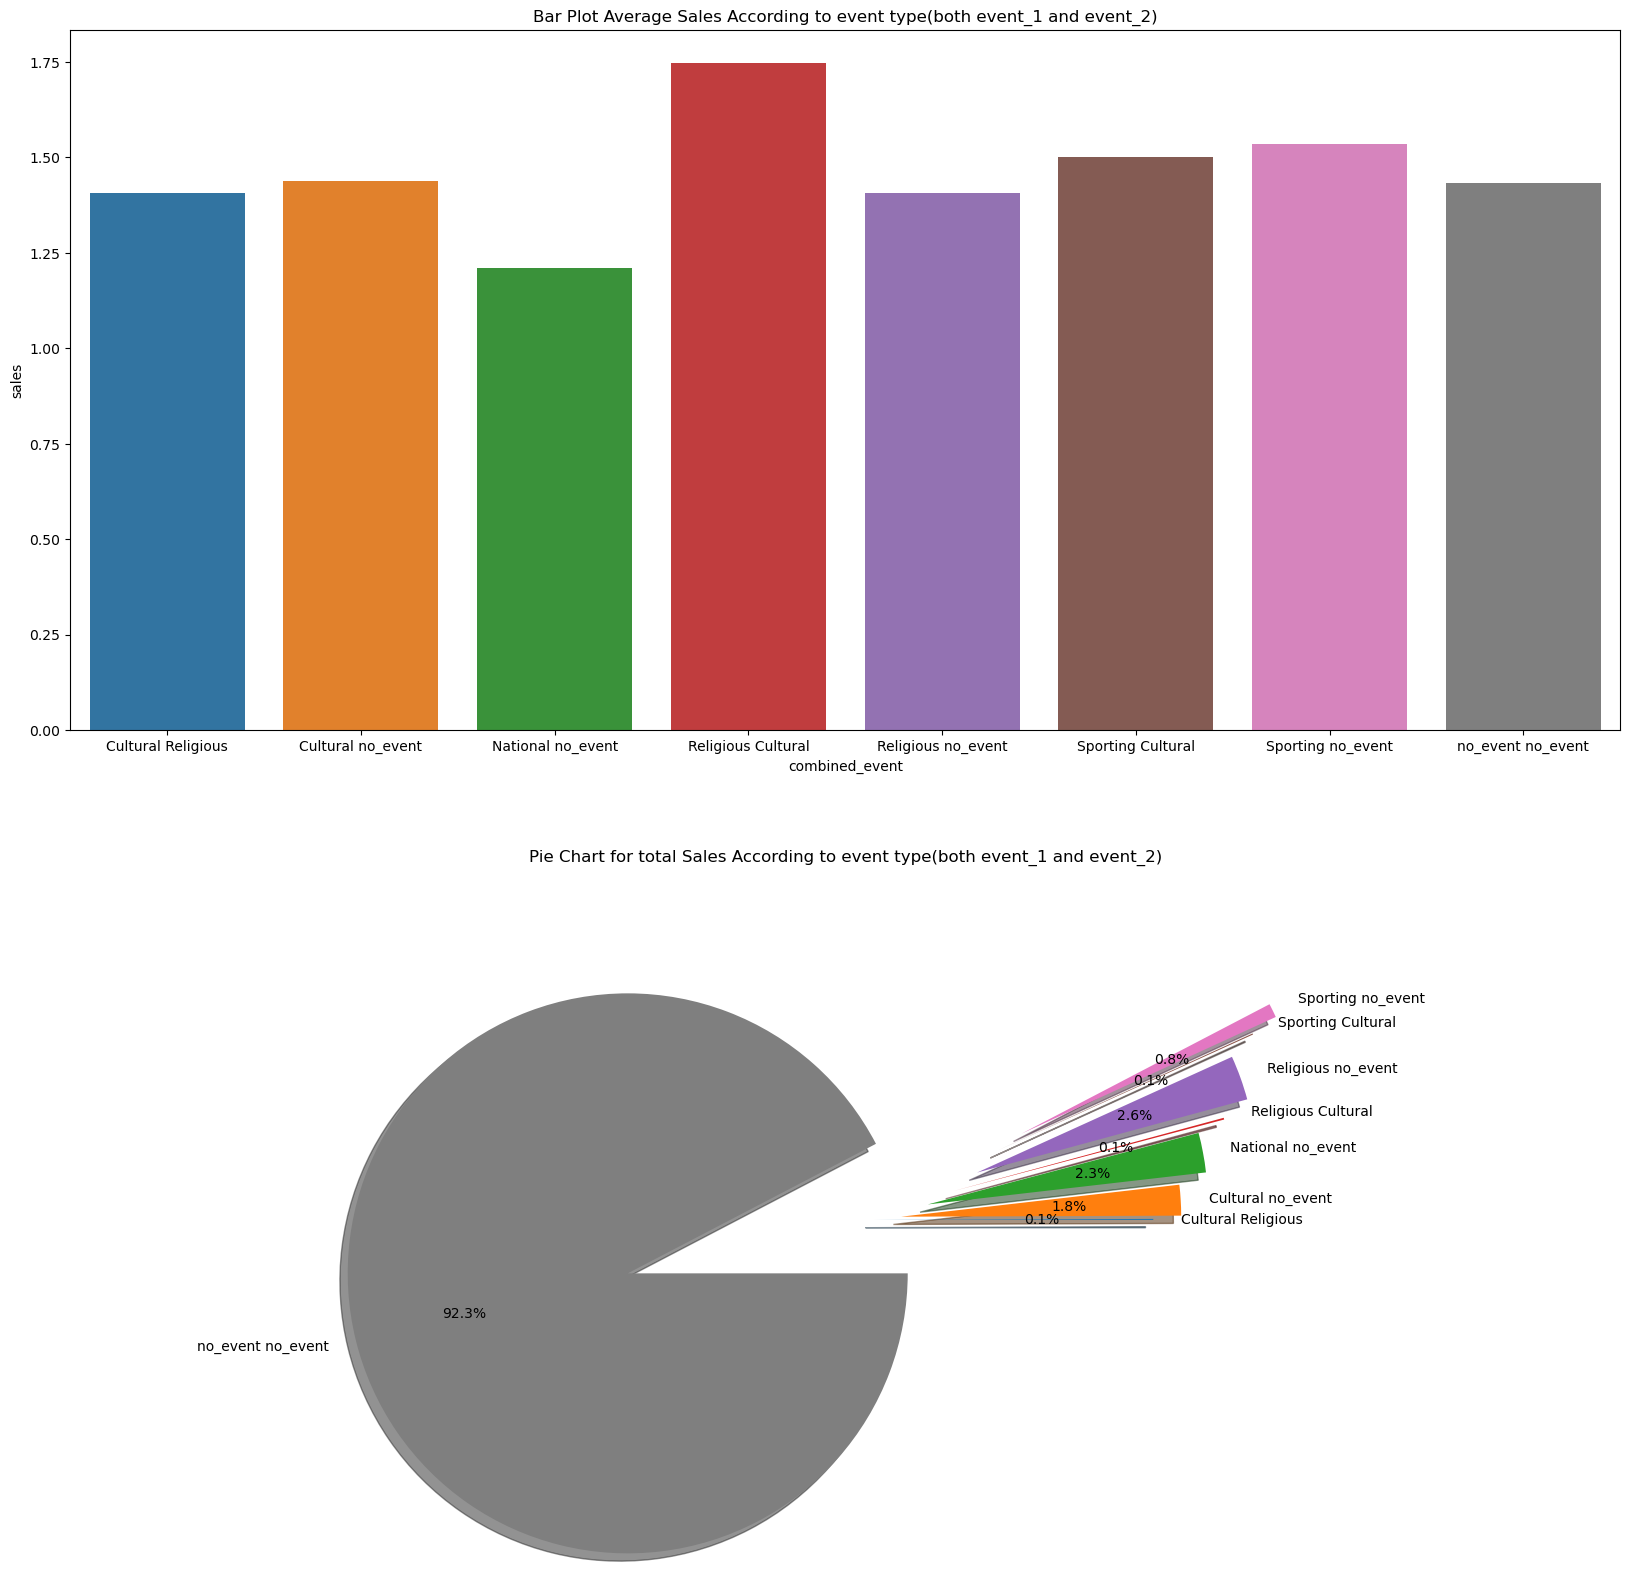

In [ ]:
df=data.groupby(['event_type_1','event_type_2']).mean()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.barplot(x='combined_event',y='sales',data=df)
plt.title("Bar Plot Average Sales According to event type(both event_1 and event_2)")
df=data.groupby(['event_type_1','event_type_2']).sum()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.subplot(212)
df['sales_total']=df['sales']/sum(df['sales'].values)*100
explode = (0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8)
plt.pie(df['sales_total'].values,labels=df['combined_event'].values,shadow=True,autopct='%1.1f%%',explode=explode)
plt.title("Pie Chart for total Sales According to event type(both event_1 and event_2)")
plt.show()

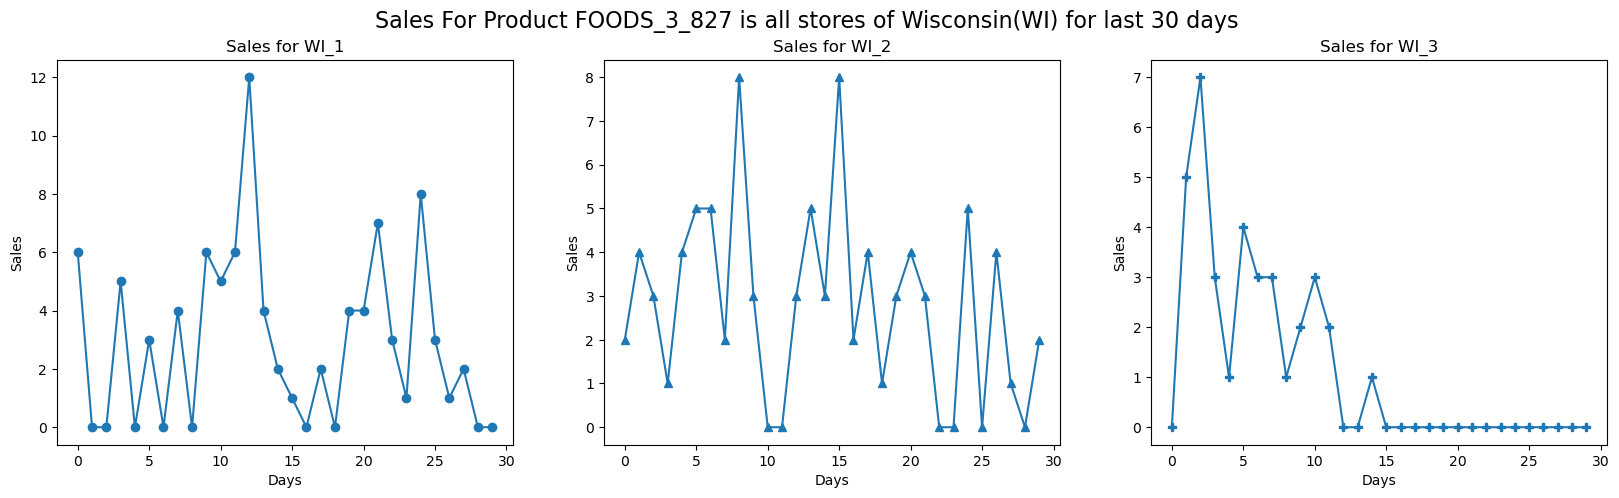

In [ ]:
df1=data[(data['item_id']=='FOODS_3_827')&(data['store_id']=='WI_1')]
df2=data[(data['item_id']=='FOODS_3_827')&(data['store_id']=='WI_2')]
df3=data[(data['item_id']=='FOODS_3_827')&(data['store_id']=='WI_3')]

df1=df1.sort_values(by='date')
df2=df2.sort_values(by='date')
df3=df3.sort_values(by='date')


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(df1['sales'].values[-30:],marker="o")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_1")

plt.subplot(132)
plt.plot(df2['sales'].values[-30:],marker="^")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_2")

plt.subplot(133)
plt.plot(df3['sales'].values[-30:],marker="P")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for WI_3")


plt.suptitle("Sales For Product FOODS_3_827 is all stores of Wisconsin(WI) for last 30 days",fontsize=16)
plt.show()

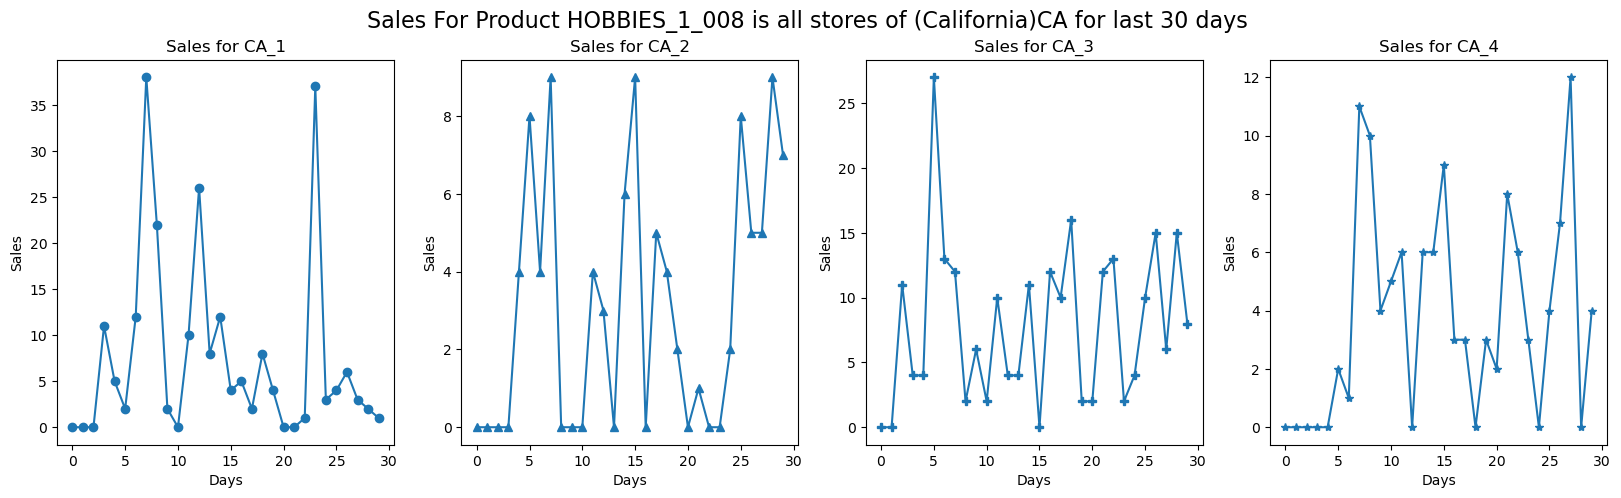

In [ ]:
#Now visualse sales for last 30 days for item HOBBIES_1_001 in state CA
df1=data[(data['item_id']=='HOBBIES_1_008')&(data['store_id']=='CA_1')]
df2=data[(data['item_id']=='HOBBIES_1_008')&(data['store_id']=='CA_2')]
df3=data[(data['item_id']=='HOBBIES_1_008')&(data['store_id']=='CA_3')]
df4=data[(data['item_id']=='HOBBIES_1_008')&(data['store_id']=='CA_4')]


df1=df1.sort_values(by='date')
df2=df2.sort_values(by='date')
df3=df3.sort_values(by='date')
df4=df4.sort_values(by='date')


plt.figure(figsize=(20,5))
plt.subplot(141)
plt.plot(df1['sales'].values[-30:],marker="o")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_1")

plt.subplot(142)
plt.plot(df2['sales'].values[-30:],marker="^")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_2")

plt.subplot(143)
plt.plot(df3['sales'].values[-30:],marker="P")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_3")

plt.subplot(144)
plt.plot(df4['sales'].values[-30:],marker="*")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for CA_4")
plt.suptitle("Sales For Product HOBBIES_1_008 is all stores of (California)CA for last 30 days",fontsize=16)
plt.show()

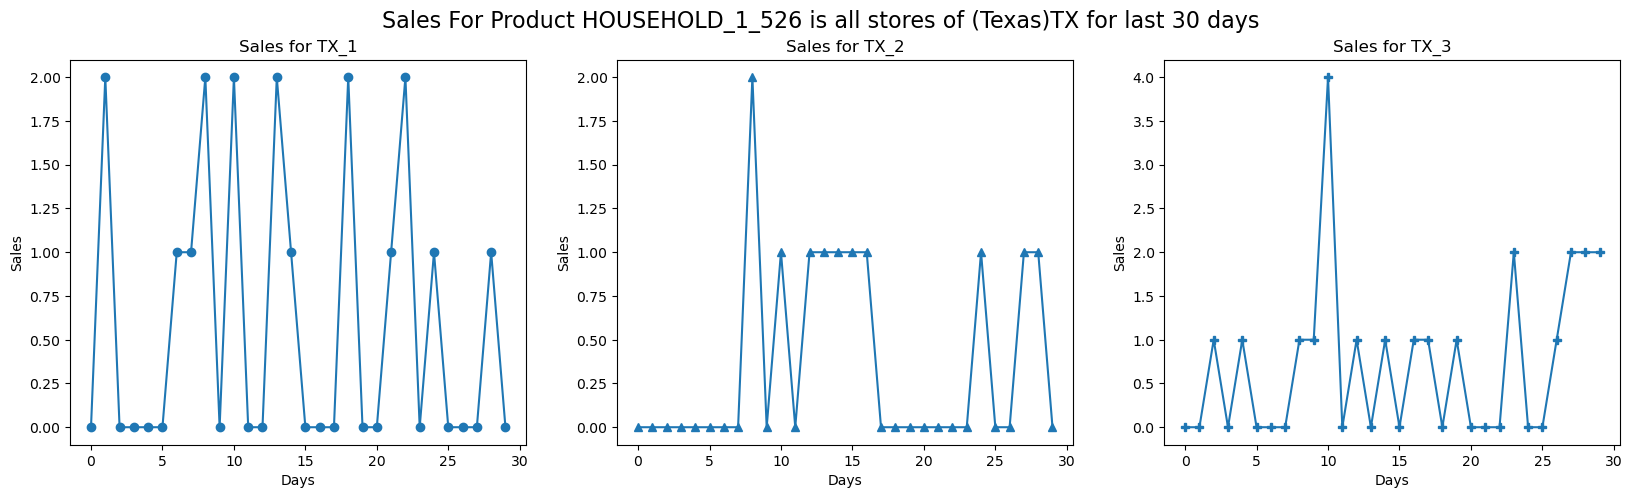

In [ ]:
#Now visualse sales for last 30 days for item HOUSEHOLD_2_516 in state CA
df1=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_1')]
df2=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_2')]
df3=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_3')]



df1=df1.sort_values(by='date')
df2=df2.sort_values(by='date')
df3=df3.sort_values(by='date')


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(df1['sales'].values[-30:],marker="o")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_1")

plt.subplot(132)
plt.plot(df2['sales'].values[-30:],marker="^")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_2")

plt.subplot(133)
plt.plot(df3['sales'].values[-30:],marker="P")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_3")

plt.suptitle("Sales For Product HOUSEHOLD_1_526 is all stores of (Texas)TX for last 30 days",fontsize=16)
plt.show()

C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

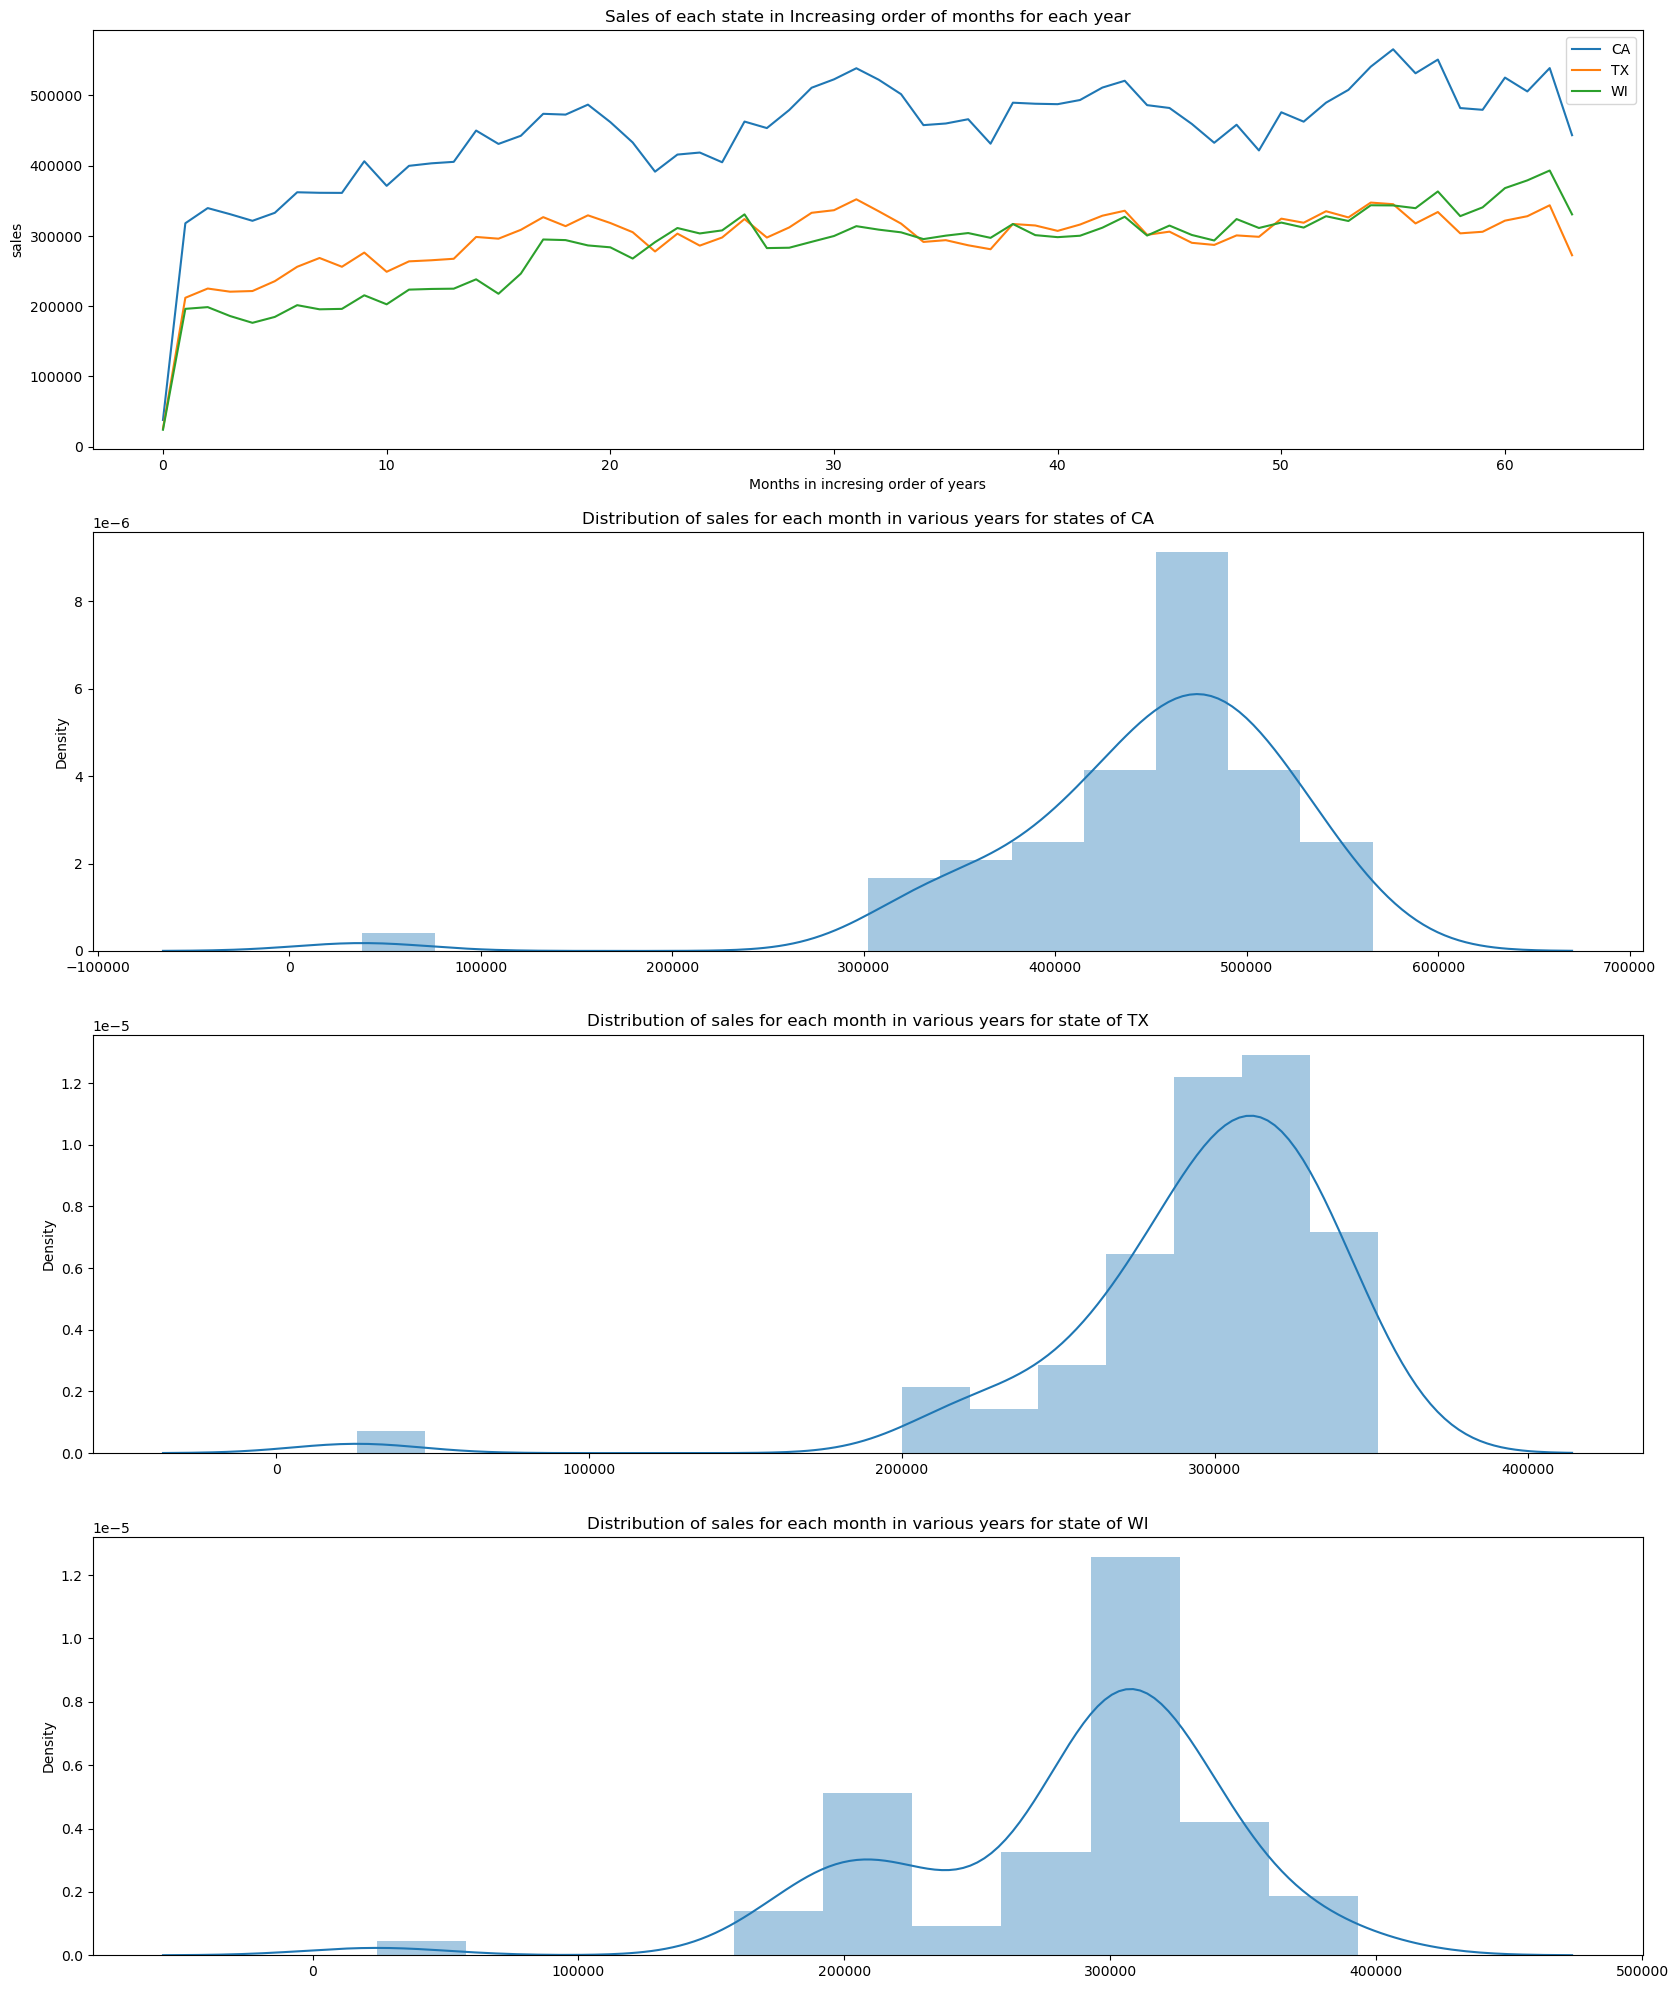

In [ ]:
df=data.groupby(['year','month','state_id']).sum()
df.reset_index(level=[0,1,2],inplace=True)
plt.figure(figsize=(20,25))
plt.subplot(411)
plt.plot(df[df['state_id']=="CA"]['sales'].values,label="CA")
plt.plot(df[df['state_id']=="TX"]['sales'].values,label="TX")
plt.plot(df[df['state_id']=="WI"]['sales'].values,label="WI")
plt.xlabel('Months in incresing order of years')
plt.ylabel('sales')
plt.title("Sales of each state in Increasing order of months for each year")
plt.legend()

plt.subplot(412)
sns.distplot(df[df['state_id']=="CA"]['sales'].values)
plt.title("Distribution of sales for each month in various years for states of CA")

plt.subplot(413)
sns.distplot(df[df['state_id']=="TX"]['sales'].values)
plt.title("Distribution of sales for each month in various years for state of TX")

plt.subplot(414)
sns.distplot(df[df['state_id']=="WI"]['sales'].values)
plt.title("Distribution of sales for each month in various years for state of WI")

plt.show()

C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mpadmara\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

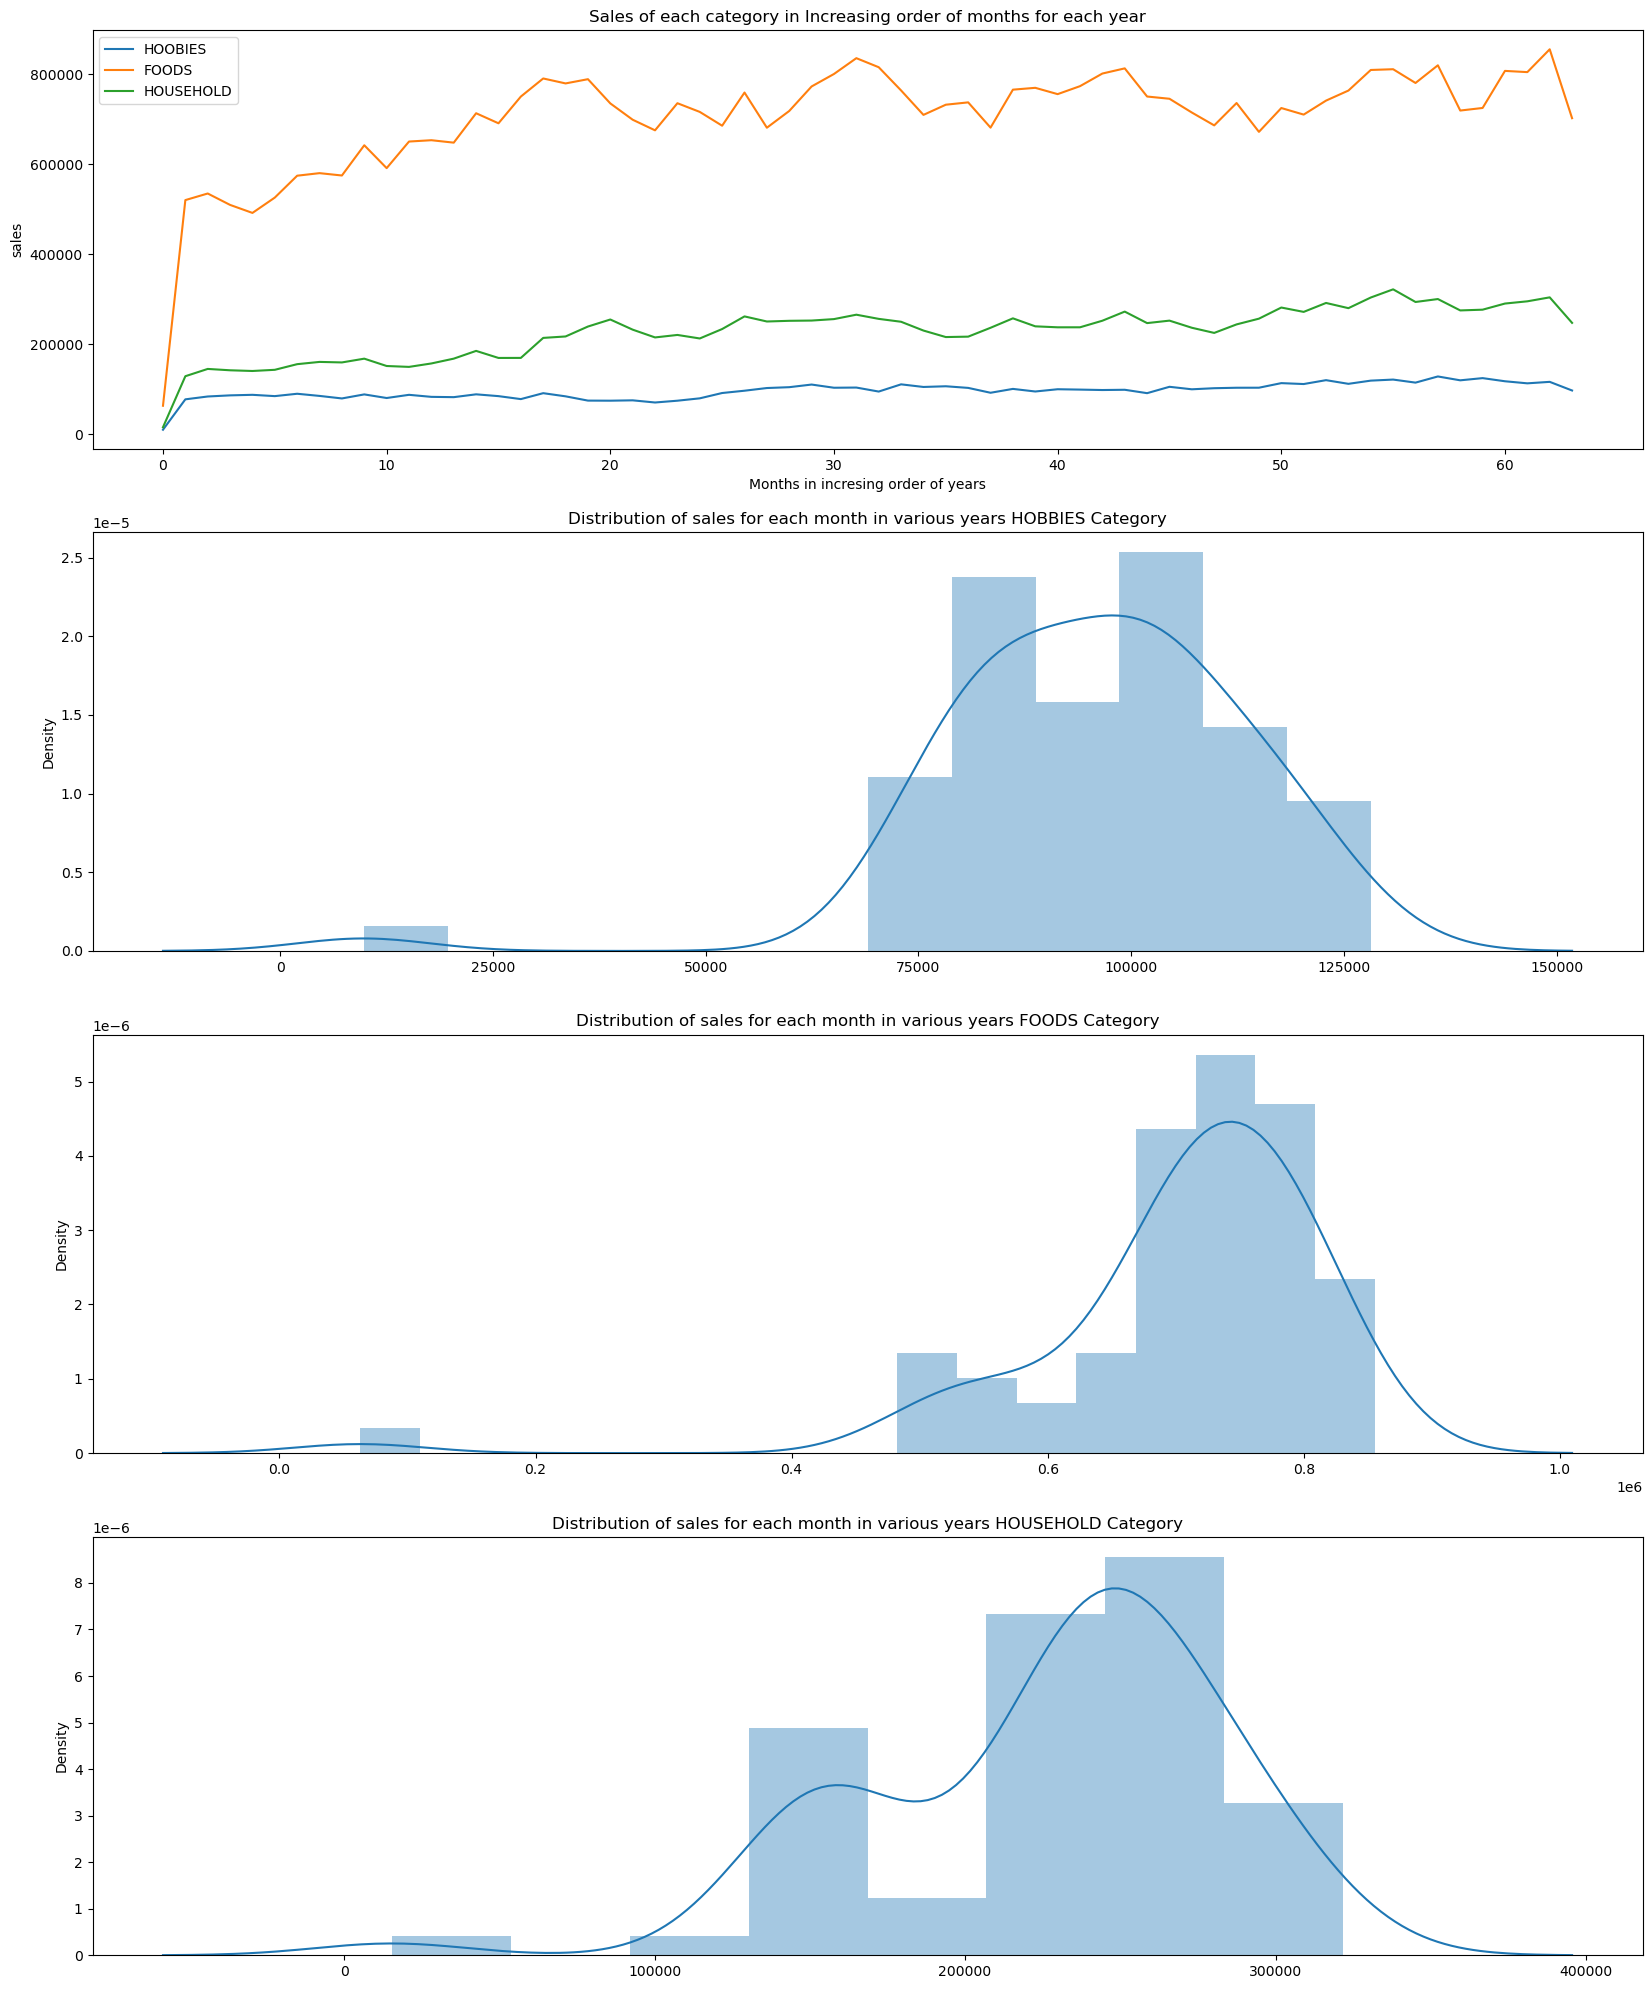

In [ ]:
df=data.groupby(['year','month','cat_id']).sum()
df.reset_index(level=[0,1,2],inplace=True)
plt.figure(figsize=(20,25))
plt.subplot(411)
plt.plot(df[df['cat_id']=="HOBBIES"]['sales'].values,label="HOOBIES")
plt.plot(df[df['cat_id']=="FOODS"]['sales'].values,label="FOODS")
plt.plot(df[df['cat_id']=="HOUSEHOLD"]['sales'].values,label="HOUSEHOLD")
plt.xlabel('Months in incresing order of years')
plt.ylabel('sales')
plt.title("Sales of each category in Increasing order of months for each year")
plt.legend()
plt.subplot(412)
sns.distplot(df[df['cat_id']=="HOBBIES"]['sales'].values)
plt.title("Distribution of sales for each month in various years HOBBIES Category")


plt.subplot(413)
sns.distplot(df[df['cat_id']=="FOODS"]['sales'].values)
plt.title("Distribution of sales for each month in various years FOODS Category")


plt.subplot(414)
sns.distplot(df[df['cat_id']=="HOUSEHOLD"]['sales'].values)
plt.title("Distribution of sales for each month in various years HOUSEHOLD Category")

plt.show()